In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

In [3]:
def generate_XOR_easy():
    inputs = []
    labels = []

    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        if 0.1*i == 0.5:
            continue

        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)

    return np.array(inputs), np.array(labels).reshape(21 ,1)

In [4]:
def show_result(x, y, pred_y):
    plt.subplot(1, 2, 1)
    plt.title('Ground Truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')

    plt.subplot(1, 2, 2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')

    plt.show()

In [5]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0-x)

def loss(y, y_hat):
    # Mean Square Error
    return np.mean((y-y_hat)**2)

def derivative_loss(y, y_hat):
    return (y-y_hat)*(2/y.shape[0])

In [6]:
class layer():
    def __init__(self, input_size, output_size):
        self.weight = np.random.normal(0, 1, (input_size+1, output_size))

    def forward(self, x):
        # Append bias into the x
        x = np.append(x, np.ones((x.shape[0], 1)), axis=1)
        self.forward_gradient = x
        self.y = sigmoid(np.matmul(x, self.weight))
        return self.y

    def backward(self, grad):
        #\frac{\partial C}{\partial \omega^{(L)}} = \frac{\partial z^{(L)}}{\partial \omega^{(L)}} \frac{\partial a^{(L)}}{\partial z^{(L)}} \frac{\partial C_0}{\partial a^{(L)}}
        self.backward_gradient = np.multiply(derivative_sigmoid(self.y), grad)
        return np.matmul(self.backward_gradient, self.weight[:-1].T)

    def update(self, learning_rate):
        self.gradient = np.matmul(self.forward_gradient.T, self.backward_gradient)
        self.weight -= learning_rate * self.gradient
        return self.gradient

In [7]:
class Dense():
    def __init__(self, width, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.layer = [layer(before, after) for before, after in zip(width[:-1], width[1:])]

    def forward(self, x):
        result = x
        for lay in self.layer:
            result = lay.forward(result)
        return result

    def backward(self, grad):
        result = grad
        for lay in self.layer[::-1]:
            result = lay.backward(result)
        return result

    def update(self):
        gradients = [lay.update(self.learning_rate) for lay in self.layer]
        return gradients

In [8]:
nn_linear = Dense([2, 4, 4, 1], 1)
nn_xor = Dense([2, 4, 4, 1], 1)

epoch = 100000
loss_tol = 0.0001

In [9]:
print('{}\nLinear Model has started\n{}'.format('-'*100, '-'*100))
x_linear, y_linear = generate_linear()
count = 0
for i in range(epoch):
    y = nn_linear.forward(x_linear)
    loss_linear = loss(y, y_linear)
    nn_linear.backward(derivative_loss(y, y_linear))
    nn_linear.update()

    if (i+1)%5000 == 0:
        print('Epoch {} loss: {}'.format(i+1, loss_linear))

    if loss_linear < loss_tol:
        count += 1
        if count == 5:
            print('Linear Model Performance is satisfactory')
            break
    else:
        count = 0

----------------------------------------------------------------------------------------------------
Linear Model has started
----------------------------------------------------------------------------------------------------
Epoch 5000 loss: 0.0037818146047146777
Epoch 10000 loss: 0.001558447987060981
Epoch 15000 loss: 0.0008758128700111306
Epoch 20000 loss: 0.0005693068981069266
Epoch 25000 loss: 0.00040380531765245786
Epoch 30000 loss: 0.0003038856192793466
Epoch 35000 loss: 0.00023872732158024425
Epoch 40000 loss: 0.0001937349194023958
Epoch 45000 loss: 0.00016125831376040758
Epoch 50000 loss: 0.0001369715175833124
Epoch 55000 loss: 0.00011827763750285421
Epoch 60000 loss: 0.00010354018244280873
Linear Model Performance is satisfactory


In [10]:
print('{}\nXOR Model has started\n{}'.format('-'*100, '-'*100))
x_xor, y_xor = generate_XOR_easy()
count = 0
for i in range(epoch):
    y = nn_xor.forward(x_xor)
    loss_xor = loss(y, y_xor)
    nn_xor.backward(derivative_loss(y, y_xor))
    nn_xor.update()

    if (i+1)%5000 == 0:
        print('Epoch {} loss: {}'.format(i+1, loss_xor))

    if loss_xor < loss_tol:
        count += 1
        if count == 5:
            print('XOR Model Performance is satisfactory')
            break
    else:
        count = 0

----------------------------------------------------------------------------------------------------
XOR Model has started
----------------------------------------------------------------------------------------------------
Epoch 5000 loss: 0.0005635906918288244
Epoch 10000 loss: 0.00017885907522759828
Epoch 15000 loss: 0.00010068474071034245
XOR Model Performance is satisfactory


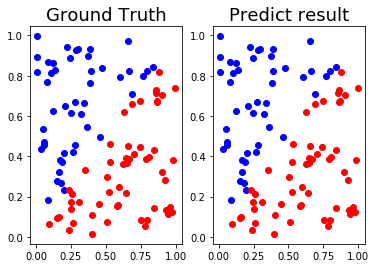

linear test loss :  9.998650667526666e-05
linear test accuracy : 100.00%

 linear test result : 
 [[1.59874280e-05]
 [9.99997616e-01]
 [4.31640750e-06]
 [4.97630860e-04]
 [1.16766819e-05]
 [3.95854445e-06]
 [3.11504112e-06]
 [2.59215700e-06]
 [2.49154996e-06]
 [9.99999314e-01]
 [9.92519378e-01]
 [2.76201833e-06]
 [9.99999382e-01]
 [2.60861225e-06]
 [2.47244166e-06]
 [4.58996364e-06]
 [9.99999383e-01]
 [2.39847915e-06]
 [2.45193153e-06]
 [9.99999362e-01]
 [2.68239981e-06]
 [2.75800076e-06]
 [9.99999381e-01]
 [3.20796695e-06]
 [9.99998963e-01]
 [9.99999407e-01]
 [2.59725283e-06]
 [2.83704416e-06]
 [9.99999393e-01]
 [9.99998984e-01]
 [2.90209478e-05]
 [9.99998747e-01]
 [9.99999351e-01]
 [3.27658508e-06]
 [9.43864606e-01]
 [9.59051055e-01]
 [3.17704325e-06]
 [2.45104506e-06]
 [2.44802058e-06]
 [2.03350185e-03]
 [1.02962447e-04]
 [9.99999369e-01]
 [2.60275046e-06]
 [9.99999382e-01]
 [4.86426911e-06]
 [9.99999380e-01]
 [9.99998757e-01]
 [9.99999403e-01]
 [9.99999323e-01]
 [2.43478012e-05]
 [

In [11]:
y1 = nn_linear.forward(x_linear)
show_result(x_linear, y_linear, np.rint(y1))
print('linear test loss : ', loss(y1, y_linear))
print('linear test accuracy : {:3.2f}%'.format(np.count_nonzero(np.round(y1) == y_linear) * 100 / len(y1)))
print('\n linear test result : \n',y1)

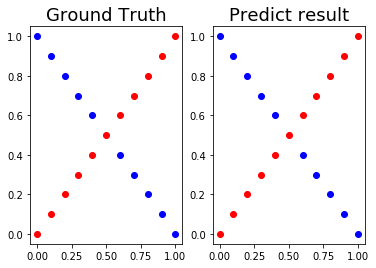

XOR test loss :  9.994957400957609e-05
XOR test accuracy : 100.00%

 XOR test result : 
 [[0.00544366]
 [0.99993656]
 [0.00720054]
 [0.99993344]
 [0.00931375]
 [0.9999239 ]
 [0.01150479]
 [0.99985182]
 [0.01319998]
 [0.97690564]
 [0.01369826]
 [0.01265334]
 [0.97746585]
 [0.01047016]
 [0.99966354]
 [0.00804613]
 [0.99976592]
 [0.0060936 ]
 [0.99976423]
 [0.0048382 ]
 [0.99974897]]


In [12]:
y2 = nn_xor.forward(x_xor)
show_result(x_xor, y_xor, np.rint(y2))
print('XOR test loss : ', loss(y2, y_xor))
print('XOR test accuracy : {:3.2f}%'.format(np.count_nonzero(np.round(y2) == y_xor) * 100 / len(y2)))
print('\n XOR test result : \n',y2)